In [1]:
%matplotlib inline
import twopoint
import numpy as np
import math
import matplotlib.pyplot as plt

We use as an example the data vector from DES Y3 3x2pt, available [here](http://desdr-server.ncsa.illinois.edu/despublic/y3a2_files/datavectors/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits).

In [2]:
file = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'
T1 = twopoint.TwoPointFile.from_fits(file)

### Cosmic shear

In [3]:
# For example, to get the theta (in arcmin) and xi_plus values for the first redshift bin:
T1.get_spectrum('xip').get_pair(1, 1)

(array([  2.8290551 ,   3.56172569,   4.48403221,   5.64521982,
          7.10706514,   8.9477756 ,  11.26400148,  14.18063413,
         17.85302577,  22.47486282,  28.29515278,  35.6203863 ,
         44.84313437,  56.4542325 ,  71.07017994,  89.47027565,
        112.63470042, 141.7929957 , 178.50204039, 224.71991553]),
 array([ 1.58390148e-05,  1.68981545e-05,  6.59989612e-06,  9.03345379e-06,
        -6.58422547e-07,  5.46005724e-07,  2.16164364e-06,  9.72750290e-07,
         1.39251127e-06,  8.82170591e-07, -3.49290888e-07,  7.05934616e-07,
         4.89449535e-07,  4.39677468e-07,  6.49146084e-07,  1.36393423e-07,
         6.07040203e-08,  2.73155152e-07,  2.89046810e-07,  1.21843735e-07]))

In [5]:
#Similarly for xi_minus:
T1.get_spectrum('xim').get_pair(1, 1)

(array([  2.8290551 ,   3.56172569,   4.48403221,   5.64521982,
          7.10706514,   8.9477756 ,  11.26400148,  14.18063413,
         17.85302577,  22.47486282,  28.29515278,  35.6203863 ,
         44.84313437,  56.4542325 ,  71.07017994,  89.47027565,
        112.63470042, 141.7929957 , 178.50204039, 224.71991553]),
 array([ 9.80297705e-06,  7.34026837e-06,  3.19680760e-06,  4.85716093e-06,
         2.88036963e-06,  7.93076600e-07,  2.65804578e-06, -3.61710955e-07,
         1.44890207e-06,  2.36561247e-07,  1.32051934e-06,  1.59212927e-06,
         1.84789469e-07,  4.86408925e-07,  1.07455895e-07,  2.85538162e-07,
         1.02524003e-07,  7.31366160e-08,  1.13367275e-07,  1.22286632e-07]))

### Galaxy-galaxy lensing

In [7]:
# For example, to get the theta (in arcmin) and gammat values for the first source and first lens bin:
T1.get_spectrum('gammat').get_pair(1, 1)

(array([  2.83602296,   3.57034138,   4.49479349,   5.65860974,
          7.1237676 ,   8.96829206,  11.29041078,  14.21378504,
         17.89409518,  22.52733114,  28.36022963,  35.70341377,
         44.94793488,  56.58609743,  71.23767601,  89.68292061,
        112.90410776, 142.13785035, 178.94095179, 225.27331141]),
 array([5.71931119e-04, 4.48828752e-04, 3.68666350e-04, 2.93579500e-04,
        2.61216077e-04, 2.34303497e-04, 1.67737297e-04, 1.33398613e-04,
        1.07679491e-04, 8.41865669e-05, 6.22295160e-05, 5.43659134e-05,
        4.49182115e-05, 3.39576243e-05, 3.49652618e-05, 3.04139544e-05,
        2.05017720e-05, 1.61154246e-05, 1.74751938e-05, 1.59820788e-05]))

### Galaxy clustering

In [8]:
# For example, to get the theta (in arcmin) and wtheta values for the first lens bin:
T1.get_spectrum('wtheta').get_pair(1, 1)

(array([  2.82771302,   3.56024067,   4.48260828,   5.64406425,
          7.10584219,   8.94634778,  11.26296148,  14.17934316,
         17.85138596,  22.47344067,  28.29312248,  35.61865537,
         44.84116117,  56.45232926,  71.06723877,  89.46844478,
        112.63082591, 141.79066145, 178.49896943, 224.71774264]),
 array([0.17359703, 0.14157034, 0.11588404, 0.0945357 , 0.07833325,
        0.06479017, 0.05475051, 0.04585087, 0.03897567, 0.03227518,
        0.02653914, 0.02182731, 0.0174731 , 0.01393598, 0.0104683 ,
        0.00784651, 0.00590801, 0.0040207 , 0.00257559, 0.00129413]))

### Redshift distributions

#### Sources

In [9]:
# The redshift distributions can be obtained with:
T1.kernels[0].z #redshift values

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995, 1.005, 1.015, 1.025, 1.035, 1.045, 1.055, 1.065, 1.075,
       1.085, 1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165,
       1.175, 1.185, 1.195, 1.205, 1.215, 1.225, 1.235, 1.245, 1.255,
       1.265, 1.275,

In [10]:
T1.kernels[0].nzs # n(z) values

[array([ 1.33506324e-05,  7.88385496e-04,  1.60747682e-03,  2.31228476e-03,
         3.02854909e-03,  4.90127071e-03,  1.10313013e-02,  1.20028115e-02,
         1.18977542e-02,  1.21028918e-02,  1.35909373e-02,  1.64594429e-02,
         1.75980772e-02,  1.77404606e-02,  1.83407611e-02,  2.03809755e-02,
         2.38449598e-02,  2.59763407e-02,  2.63863620e-02,  2.65987087e-02,
         2.70711827e-02,  2.76513435e-02,  2.80316121e-02,  2.83213204e-02,
         2.82827040e-02,  2.75777012e-02,  2.64224113e-02,  2.55137232e-02,
         2.51214356e-02,  2.45149834e-02,  2.35495467e-02,  2.23164280e-02,
         2.13843401e-02,  2.09590533e-02,  2.09424970e-02,  2.08640928e-02,
         2.06960510e-02,  2.03434480e-02,  1.97335569e-02,  1.87997525e-02,
         1.77771503e-02,  1.65690775e-02,  1.53388126e-02,  1.44138229e-02,
         1.35605197e-02,  1.26465991e-02,  1.14035873e-02,  1.00378542e-02,
         9.58280449e-03,  9.15732051e-03,  8.90110943e-03,  8.62783013e-03,
         8.4

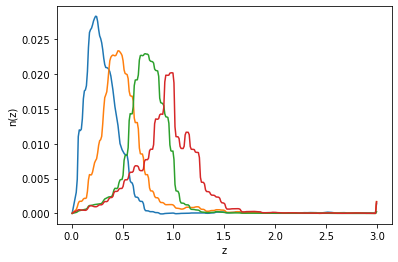

In [12]:
# The number of tomographic bins is:
nbin_source = (T1.kernels[0].nzs)

for i in range(len(nbin_lens)):
    plt.plot(T1.kernels[0].z, T1.kernels[0].nzs[i])
    plt.xlabel('z')
    plt.ylabel('n(z)')

#### Lenses

In [13]:
# The redshift distributions can be obtained with:
T1.kernels[1].z #redshift values

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995, 1.005, 1.015, 1.025, 1.035, 1.045, 1.055, 1.065, 1.075,
       1.085, 1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165,
       1.175, 1.185, 1.195, 1.205, 1.215, 1.225, 1.235, 1.245, 1.255,
       1.265, 1.275,

In [ ]:
T1.kernels[0].nzs # n(z) values

[array([ 1.33506324e-05,  7.88385496e-04,  1.60747682e-03,  2.31228476e-03,
         3.02854909e-03,  4.90127071e-03,  1.10313013e-02,  1.20028115e-02,
         1.18977542e-02,  1.21028918e-02,  1.35909373e-02,  1.64594429e-02,
         1.75980772e-02,  1.77404606e-02,  1.83407611e-02,  2.03809755e-02,
         2.38449598e-02,  2.59763407e-02,  2.63863620e-02,  2.65987087e-02,
         2.70711827e-02,  2.76513435e-02,  2.80316121e-02,  2.83213204e-02,
         2.82827040e-02,  2.75777012e-02,  2.64224113e-02,  2.55137232e-02,
         2.51214356e-02,  2.45149834e-02,  2.35495467e-02,  2.23164280e-02,
         2.13843401e-02,  2.09590533e-02,  2.09424970e-02,  2.08640928e-02,
         2.06960510e-02,  2.03434480e-02,  1.97335569e-02,  1.87997525e-02,
         1.77771503e-02,  1.65690775e-02,  1.53388126e-02,  1.44138229e-02,
         1.35605197e-02,  1.26465991e-02,  1.14035873e-02,  1.00378542e-02,
         9.58280449e-03,  9.15732051e-03,  8.90110943e-03,  8.62783013e-03,
         8.4

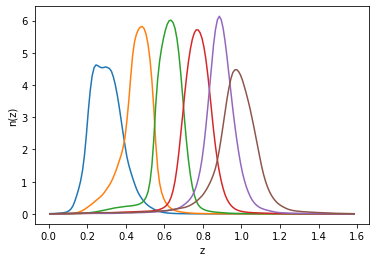

In [14]:
# The number of tomographic bins is:
nbin_lens = (T1.kernels[1].nzs)

for i in range(len(nbin_lens)):
    plt.plot(T1.kernels[1].z, T1.kernels[1].nzs[i])
    plt.xlabel('z')
    plt.ylabel('n(z)')

### Covariance

In [15]:
# The covariance matrix can be accessed with:
cov = T1.covmat
print(cov)

[[4.18751902e-11 1.89664160e-13 1.64620430e-13 ... 1.39780980e-13
  1.06040130e-13 7.62937350e-14]
 [1.89664160e-13 2.66687238e-11 1.55703370e-13 ... 1.45069314e-13
  1.10248360e-13 7.95618960e-14]
 [1.64620430e-13 1.55703370e-13 1.69488605e-11 ... 1.49508208e-13
  1.13803890e-13 8.23458700e-14]
 ...
 [1.39780980e-13 1.45069314e-13 1.49508208e-13 ... 2.73981038e-08
  1.73422918e-08 8.79598969e-09]
 [1.06040130e-13 1.10248360e-13 1.13803890e-13 ... 1.73422918e-08
  2.24895830e-08 1.39685458e-08]
 [7.62937350e-14 7.95618960e-14 8.23458700e-14 ... 8.79598969e-09
  1.39685458e-08 1.90129447e-08]]


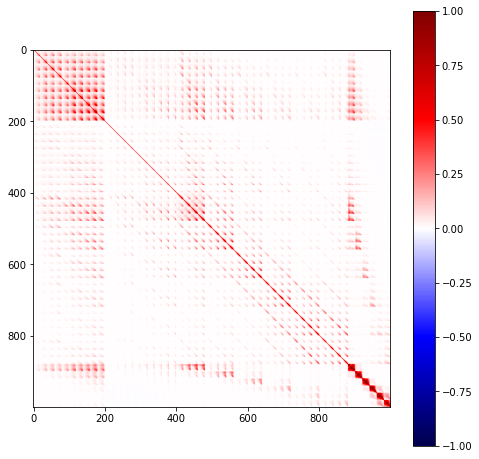

In [16]:
ndata = len(T1.covmat)

pp_norm = np.zeros((ndata,ndata))
for i in range(ndata):
    for j in range(ndata):
        pp_norm[i][j] = cov[i][j]/ np.sqrt(cov[i][i]*cov[j][j])

cmap = 'seismic'
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
im3 = ax.imshow(pp_norm, cmap=cmap, vmin=-1, vmax=1)
fig.colorbar(im3, orientation='vertical')